In [1]:
from aaexpctrl_backend import Experiment
import matplotlib.pyplot as plt

In [2]:
exp = Experiment()
samp_rate = 1e6
exp.add_ao_device("PXI1Slot3", "PXI1Trig0", False, samp_rate)
exp.add_ao_device("PXI1Slot4", "PXI1Trig0", True, samp_rate)
exp.add_do_device("PXI1Slot6", "PXI1Trig0", False, samp_rate)

exp.add_ao_channel("PXI1Slot3", 0)
exp.sine("PXI1Slot3", "ao0", 0.0, 1., True, 2.0, 5.)
exp.constant("PXI1Slot3", "ao0", 10., 1-1e-6, 5., False)

exp.add_ao_channel("PXI1Slot4", 0)
exp.sine("PXI1Slot4", "ao0", 0.0, 1., True, 2.0, 5.)
exp.constant("PXI1Slot4", "ao0", 10., 1-1e-6, 5., False)

exp.add_do_channel("PXI1Slot6", 0, 1)
exp.add_do_channel("PXI1Slot6", 0, 0)

exp.high("PXI1Slot6", "port0/line1", 0., 1.)
exp.high("PXI1Slot6", "port0/line0", 0., 1.)

exp.high("PXI1Slot6", "port0/line1", 10., 1-2e-6)
exp.high("PXI1Slot6", "port0/line0", 10., 1-2e-6)

exp.compile_with_stoptime(11.)

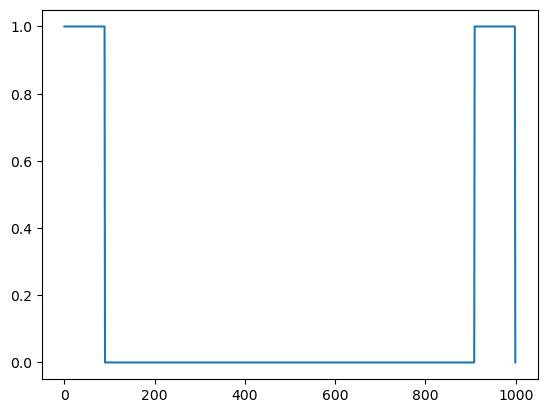

In [3]:
sig = exp.calc_signal("PXI1Slot6", 0., 11., 1000)
plt.plot(sig[1])

In [9]:
exp.stream_exp(50)